In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,SpectralClustering
from scipy import linalg
import re
import itertools

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

In [3]:
# Read it in
survey_40 = pd.read_csv('survey_40.csv')

In [4]:
survey_40

,Unnamed: 0,subject_id,image_name,image_name_2,T0,T1,T2,T3,T4,T5
0,0,20742087,2521127-13-0142.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,My criticism is this: Senior officers should p...,NaN,NaN
1,1,20742096,2521127-13-0143.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,"Too much stress is placed on the ""Junior Offic...",NaN,none
2,2,20742102,2521127-13-0144.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,The men do not get enough time off. [paragraph...,NaN,NaN
3,3,20742110,2521127-13-0145.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,The mens (my schools) time is taken up in the ...,NaN,none
4,4,20742116,2521127-13-0146.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,The location of this post is not suited for ta...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1218,1218,20750000,2521127-13-1376.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,We should not have the same thing day after da...,NaN,NaN
1219,1219,20750004,2521127-13-1377.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,I do not agree with the National Guardsmen on ...,NaN,NaN
1220,1220,20750008,2521127-13-1378.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,I do believe training programs should be chang...,NaN,NaN
1221,1221,20750010,2521127-13-1379.jpg,NaN,A document that contains one question (Q.88),NaN,NaN,I believe that enlisted men should be giving t...,NaN,NaN


In [5]:
len(survey_40)

1223

In [6]:
no_float = [i for i in survey_40['T3'].tolist() if type(i) != float]
no_unclear = [i for i in no_float if '[unclear]' not in i]

In [7]:
embed = model.encode(no_unclear)
first = pd.DataFrame({'Response': no_unclear, 'Embedding': embed})
second = pd.DataFrame({'Response': no_unclear})

In [8]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x

In [9]:
second.iloc[:, 1:]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,-0.422326,0.092550,0.733197,0.492622,-0.511888,-0.346319,0.286839,-0.385252,0.398126,-0.213543,...,-0.297408,-0.061568,-0.292067,-3.063446,-1.045430,0.020541,-0.130146,0.407433,-0.415785,-0.294007
1,-0.558739,-0.227968,0.870968,0.494883,-0.196091,-0.248421,0.354274,-0.264491,0.630206,-0.766950,...,-0.532696,-0.394978,-0.632359,-2.108295,-0.944126,0.215347,-0.054073,0.613488,-0.549291,0.750456
2,0.078517,0.243764,0.623894,0.445617,-0.535047,0.352846,0.997637,-0.200046,0.411726,-0.972305,...,-0.199377,0.452974,-0.231664,-3.043501,-0.543576,-0.231072,0.229142,0.972647,-0.505569,0.194745
3,-0.452413,0.012374,0.292558,0.220502,-0.362696,-0.504813,0.561915,-0.944626,0.438334,-0.019497,...,-0.866033,-0.144358,-0.491476,-1.661311,-1.095372,-0.229269,0.037248,0.830799,-0.334356,-0.309428
4,-0.675999,0.421742,0.356232,0.482641,0.290257,-0.801562,1.212314,-0.713638,0.499186,-0.802754,...,-0.229743,0.031294,-0.631737,-1.658962,-0.667047,-0.131259,-0.099409,0.738065,-0.396772,0.608597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.134504,0.416020,0.435890,0.113885,0.469218,0.229231,0.922816,-0.366361,-0.019335,-0.790147,...,0.079887,0.483429,0.388868,-1.879244,-0.646699,0.258150,-0.268132,1.029354,-0.518865,-0.053394
1034,-0.067994,-0.189804,0.059397,0.740314,-0.682780,-0.341905,0.077691,-0.268206,0.408718,-0.585208,...,-0.401033,0.687849,-0.405456,-2.055048,-0.317738,-0.009209,0.752603,-0.276079,-1.034624,1.159416
1035,0.650752,-0.139623,0.601836,0.261732,0.115647,0.364238,0.861056,-0.908669,0.740340,-1.263317,...,-0.597013,0.161920,-0.549242,-1.938351,-0.272798,0.200285,-0.123204,0.963479,-0.771642,0.707572
1036,0.410834,-0.121540,1.352237,0.356899,0.361782,-0.200515,0.535223,0.083675,-0.256037,-1.507825,...,0.303884,-0.141390,0.531924,-1.064502,0.075255,0.231455,0.217479,1.112987,0.199064,-0.241590


In [10]:
eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals))

NameError: name 'graph_laplacian' is not defined

In [11]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

NameError: name 'graph_laplacian' is not defined

In [12]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=1), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

NameError: name 'eigenvcts' is not defined

In [13]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

NameError: name 'eigenvals' is not defined

NameError: name 'sns' is not defined

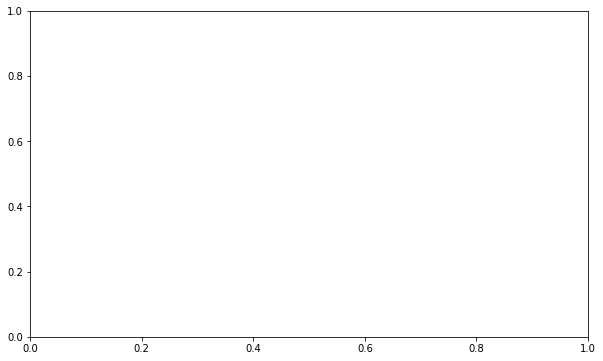

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

In [ ]:
index_lim = 30

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
# ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [ ]:
spectral = SpectralClustering(n_clusters=4,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())
first

In [15]:
survey_64 = pd.read_csv('survey_64.csv')

In [16]:
no_float = [i for i in survey_64['T7'].tolist() if type(i) != float]
no_unclear = [i for i in no_float if '[unclear]' not in i]

In [17]:
embed = model.encode(no_unclear)
first = pd.DataFrame({'Response': no_unclear, 'Embedding': embed})
second = pd.DataFrame({'Response': no_unclear})

In [18]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x

In [19]:
eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals))

NameError: name 'graph_laplacian' is not defined

In [22]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

NameError: name 'graph_laplacian' is not defined

In [23]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=1), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

NameError: name 'eigenvcts' is not defined

In [24]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

NameError: name 'eigenvals' is not defined

NameError: name 'sns' is not defined

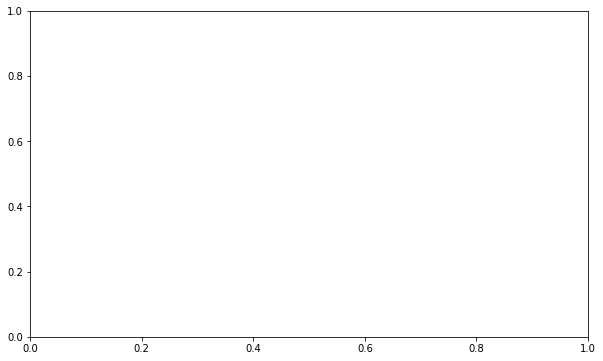

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

NameError: name 'sns' is not defined

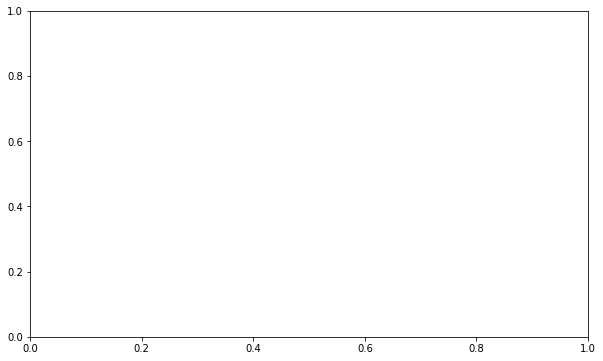

In [26]:
index_lim = 30

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
# ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [27]:
spectral = SpectralClustering(n_clusters=4,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())
first

,Response,Embedding,Cluster,bag
0,There is such a thing as prejudice in this arm...,"[0.1699564, 0.57617515, 0.30521023, 0.8890215,...",2,"[there, is, such, a, thing, as, prejudice, in,..."
1,I'll like to go into combat and fight. That's ...,"[0.13138291, -0.24039118, 0.8729173, 0.4838235...",0,"[i'll, like, to, go, into, combat, and, fight...."
2,I think the army would be a lot better if the ...,"[-0.33606243, -0.34791276, -0.21516825, 0.7292...",2,"[i, think, the, army, would, be, a, lot, bette..."
3,I think some outfits get more breaks than othe...,"[-0.10866141, 0.00807412, -0.31280532, 0.25040...",2,"[i, think, some, outfits, get, more, breaks, t..."
4,As a quarter master outfit I feel like we shou...,"[0.20223469, 0.47886428, 0.21240284, -0.135440...",2,"[as, a, quarter, master, outfit, i, feel, like..."
...,...,...,...,...
933,besides the coal strikes which grief me extrem...,"[0.42243466, -0.52338254, -0.048366357, 0.2493...",2,"[besides, the, coal, strikes, which, grief, me..."
934,The army as a whole does very well. I expect a...,"[0.004569292, 0.15043795, -0.20711683, 0.40125...",2,"[the, army, as, a, whole, does, very, well., i..."
935,The Army Technical School to my opinion could ...,"[-0.1428335, -0.150794, 0.76927316, 0.34600088...",2,"[the, army, technical, school, to, my, opinion..."
936,Many of these questions don't apply to our squ...,"[0.358985, 0.33256057, 0.52928954, 0.34767458,...",2,"[many, of, these, questions, don't, apply, to,..."


In [28]:
cluster_0 = [i for i in first['Response'][first['Cluster'] == 0]]

In [29]:
cluster_0

["I'll like to go into combat and fight. That's all I really want.",
 'I could do better out of the army than in because of raising food for the army and in the way of food staples to keep the country with a little more things. This way the folks are selling out what I need to do at home.',
 "The rest of my company all but 23 of us had a 10 day furlough and i don't think it is fair that they should not give the rest of us a 10 day furlough because we are doing the very same thing they are and further more we are entitled to a furlough. The officers could treat us a bit better and the food could be better.",
 'As long as an EM at camp is withing reasonable distance from his home he should be allowed to go home as often as possible because eventually he will be transferred to a place when it will be impossible to go home for a long period.',
 'I am glad I am in the Army, but I will be glad when I get back home. I will be glay [glad] to stay till it all over.',
 'Back over a few pages in 

# Including my necessary functions

In [30]:
def split_responses(responses):
    all_sentences = []
    response_numbers = []
    idx = 0
    for i in responses:
        temp = i.split('. ')
        for k in temp:
            response_numbers.append(idx)
        for j in temp:
            all_sentences.append(j)
        idx += 1
    return all_sentences, response_numbers

In [31]:
def get_index(rankings, responses):
    response_idx = []
    count = 0
    for i in rankings:
        temp = responses[i]
        if temp not in response_idx:
            response_idx.append(temp)
    return response_idx

In [32]:
embed_split_0 = model.encode(split_responses(cluster_0)[0])

In [33]:
U, S, Vt = linalg.svd(embed_split_0, full_matrices = False)

In [34]:
def DEIM(M): # row/column selection
        p = []
        p.append(np.argmax(np.abs(M[:,0]))) # row index of the largest value in the first column of M
        for i in range(1,323):
            res = M[:,i] - np.dot(M[:,:i],np.dot(np.linalg.inv(M[:,:i][p]), M[:,i][p]))
            p.append(np.argmax(np.abs(res)))
        return p

In [35]:
ranking_0 = DEIM(U)

In [36]:
sentences_0, response_number_0 = split_responses(cluster_0)

In [37]:
[cluster_0[i] for i in get_index(ranking_0, response_number_0)]

['A soldier should be stationed nearer home. He would like the Army much better if so. He would have more to do and see his friends more often. We should have more rifle practice than what we do and instead of seeing the way things are done in pictures',
 'Back over a few pages in the questions about the Japs and Germans, I said they should be wiped off the face of the earth, well I still think so but if they surrendered and gave up all that they have captured and agreed to some very strict peace terms and prepare in some way to hold them to those terms it might be all right to let them surrender. ',
 'I would like to get out of this camp pretty soon and get a furlough.',
 "It would be a pretty good idea to give men like myself and many others like me who have put in from 6 months to a year service at least a 10 or 15 day furlough. It would make them a lot happier and they would enjoy working harder. There isn't any use putting down any more because I honestly don't believe it will do 

In [145]:
sentences_0[ranking_0[0]]

'He would like the Army much better if so'

In [146]:
sentences_0[ranking_0[1]]

''

## For cluster 1

In [74]:
cluster_1 = [i for i in first['Response'][first['Cluster'] == 1]]

In [75]:
embed_split_1 = model.encode(split_responses(cluster_1)[0])

In [76]:
U1, S1, Vt1 = linalg.svd(embed_split_1, full_matrices = False)

In [77]:
ranking_1 = DEIM(U1)

In [78]:
sentences_1, response_number_1 = split_responses(cluster_1)

In [79]:
[cluster_1[i] for i in get_index(ranking_1, response_number_1)]

["In re #96, the war has made things better for my friends and some of my relatives, but in my own family it has quartered our income. My wife and child are living on my army pay plus a portion of our savings, when our savings are gone, I don't know what they will do. My wife is not well enough to work, and my army pay is not large enough to live on. I have a personal gripe, in that I tried to enlist and was refused, but was accepted by the draft. Discharge all venereal cases, with their resultant chances of spreading infection.",
 "This pertains as far as I know to our company. We have been here too long and none of the fellows like it here at this camp. Most of us have been here for at least six months and we don't seem to be learning what we should. All this doesn't do our morale much good. In fact",
 "Sir, I feel just this way. I got married after a years service in the army. Planned on it before but wouldn't for the reason that the public would feel that I was a draft dodger. And 

In [80]:
sentences_1[ranking_1[0]]

'My wife is not well enough to work, and my army pay is not large enough to live on'

In [81]:
sentences_1[ranking_1[1]]

'In fact'

## For Cluster 2

In [40]:
cluster_2 = [i for i in first['Response'][first['Cluster'] == 2]]
embed_split_2 = model.encode(split_responses(cluster_2)[0])
U2, S2, Vt2 = linalg.svd(embed_split_2, full_matrices = False)
ranking_2 = DEIM(U2)
sentences_2, response_number_2 = split_responses(cluster_2)
[cluster_2[i] for i in get_index(ranking_2, response_number_2)]


['I realize that the army is a very large organization to run, but they could surely do a better job of placing their men where they are best fitted. "for instance" if a man comes in the army that has been a specialised mechanic all his life, the army will no doubt place him in the guard sqd. or send him to a cook &',
 'It takes too long to relieve a man when he is on guard. The Marine guard is much more efficient in this respect as each man goes to his own post without being marched around the whole regiment by a corporal of the guard. Some of our N.C.O. are kids who never did a good days work in their lives or had men under them. So they seem to',
 "I haven't had a 24 hour pass since I arrived here 2.1/2 months ago and also have not had a day off as well. The transportation system is very poorly run. Headquarters seem to be trying to run down the morale of the men instead of building it up and doesn't seem to know what it is doing. All my troubles could be eased however if I could",


In [41]:
sentences_2[ranking_2[0]]

'I realize that the army is a very large organization to run, but they could surely do a better job of placing their men where they are best fitted'

In [42]:
sentences_2[ranking_2[1]]

'So they seem to'

## For Cluster 3

In [43]:
cluster_3 = [i for i in first['Response'][first['Cluster'] == 3]]
embed_split_3 = model.encode(split_responses(cluster_3)[0])
U3, S3, Vt3 = linalg.svd(embed_split_3, full_matrices = False)
ranking_3 = DEIM(U3)
sentences_3, response_number_3 = split_responses(cluster_3)
[cluster_3[i] for i in get_index(ranking_3, response_number_3)]

['Need better cooks at this camp they have good food to cook but they make hell of a mess cooking it. I feel that lots of time is wasted in school if they would take advantage of the time they would not have to get up in the middle of the night to start. 6 hours a day should be plenty.',
 'I would like to be back in what I was trained for. I have lots of duties and no chance for a promotion. The officers have picks. The food could be better and cooked better. Every one could be treated more the same. Each man could placed where he fit best. ',
 "I don't think we have enough time to ourselves. When we get through with our regular duties it is 6:30 in the evening and by the time we have eaten, washed, gotten our mail and get into town it is almost time to get back to camp for bed check. They changed our check from 1 A.M. to 11:30 P.M. I think the food could be better.",
 "Maybe if we [insertion]were[/insertion] given good food that good non-coms officers people wouldn't mind staying in t

In [44]:
sentences_3[ranking_3[0]]

'Need better cooks at this camp they have good food to cook but they make hell of a mess cooking it'

In [45]:
sentences_3[ranking_3[1]]

'Every one could be treated more the same'

In [46]:
embed_0 = model.encode(cluster_0)

In [84]:
embed_1 = model.encode(cluster_1)

In [69]:
embed_2 = model.encode(cluster_2)

In [47]:
embed_3 = model.encode(cluster_3)

In [48]:
def confusion(X, Y, same_matrix = False):
    #Get desire Shapes
    W = np.transpose(X)
    V = np.transpose(Y)
    
    
    norm_W = np.zeros(np.shape(W))
    norm_V = np.zeros(np.shape(V))
    
    for i in range(0, np.shape(norm_W)[1]):
        temp = W[:, i] / np.linalg.norm(W, axis = 0)[i]
        norm_W[:, i] = temp
    for i in range(0, np.shape(norm_V)[1]):
        temp = V[:, i] / np.linalg.norm(V, axis = 0)[i]
        norm_V[:, i] = temp
    
    WtW = np.transpose(norm_W) @ norm_W
    WtV = np.transpose(norm_W) @ norm_V
    
    if same_matrix:
        return WtW
    else:
        return WtV
    

In [49]:
test = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
test2 = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])

In [50]:
confusion(test, test2)

array([[1.        , 1.        , 1.        ],
       [0.97463185, 0.97463185, 0.97463185],
       [0.95941195, 0.95941195, 0.95941195],
       [0.95125831, 0.95125831, 0.95125831]])

In [156]:
len(cluster_0)

134

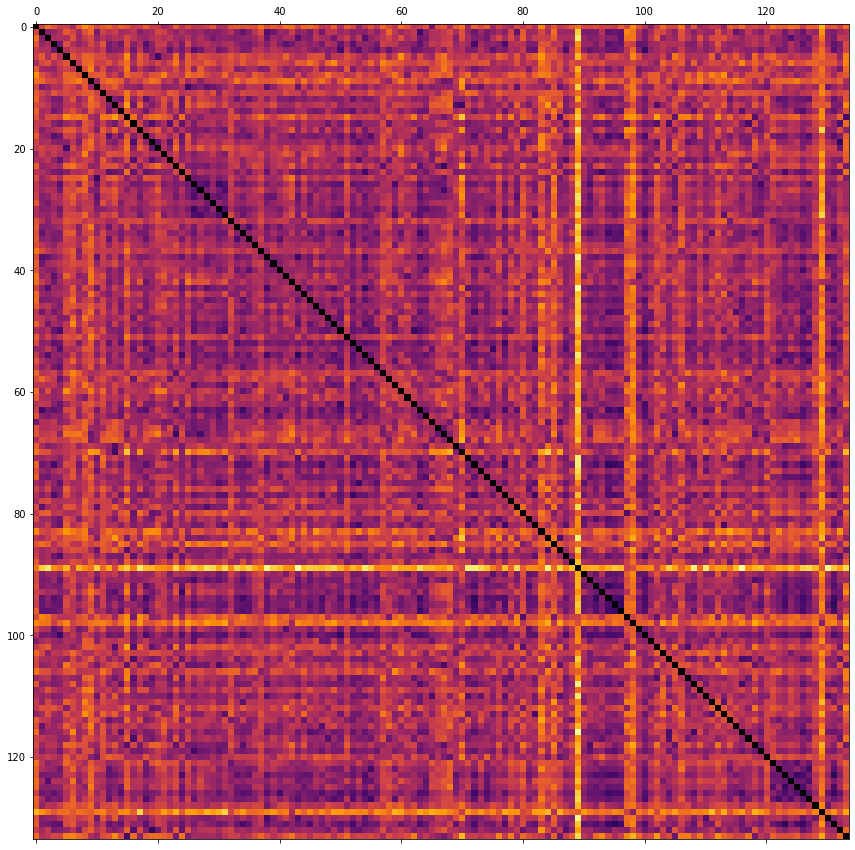

In [113]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(confusion(embed_0, embed_0), cmap = 'inferno_r')

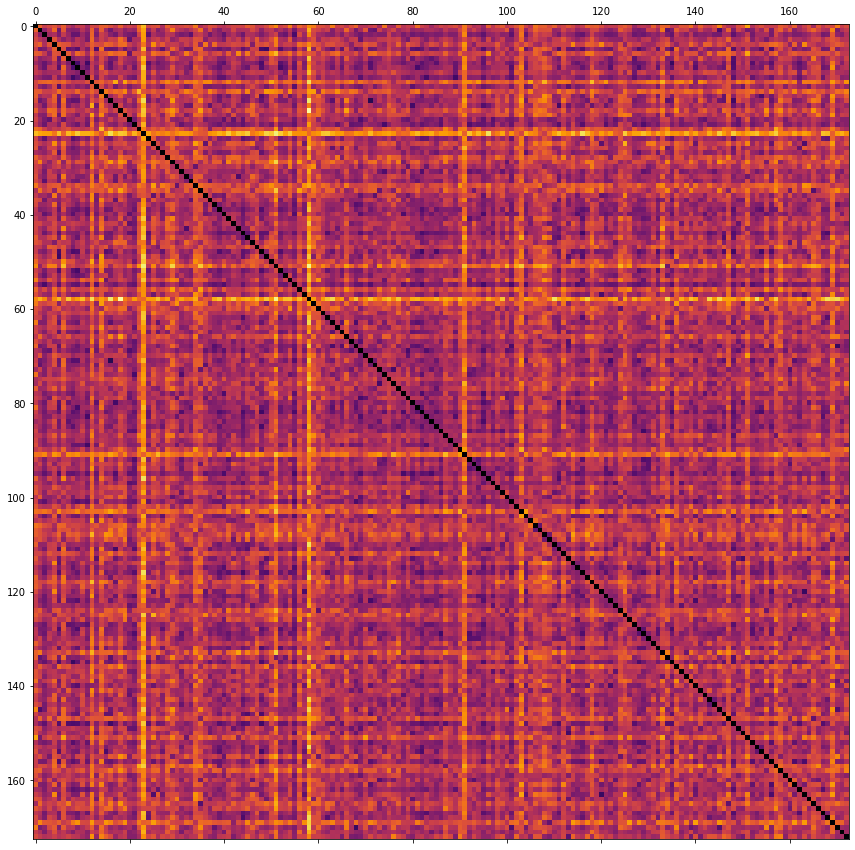

In [114]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(confusion(embed_1, embed_1), cmap = 'inferno_r')

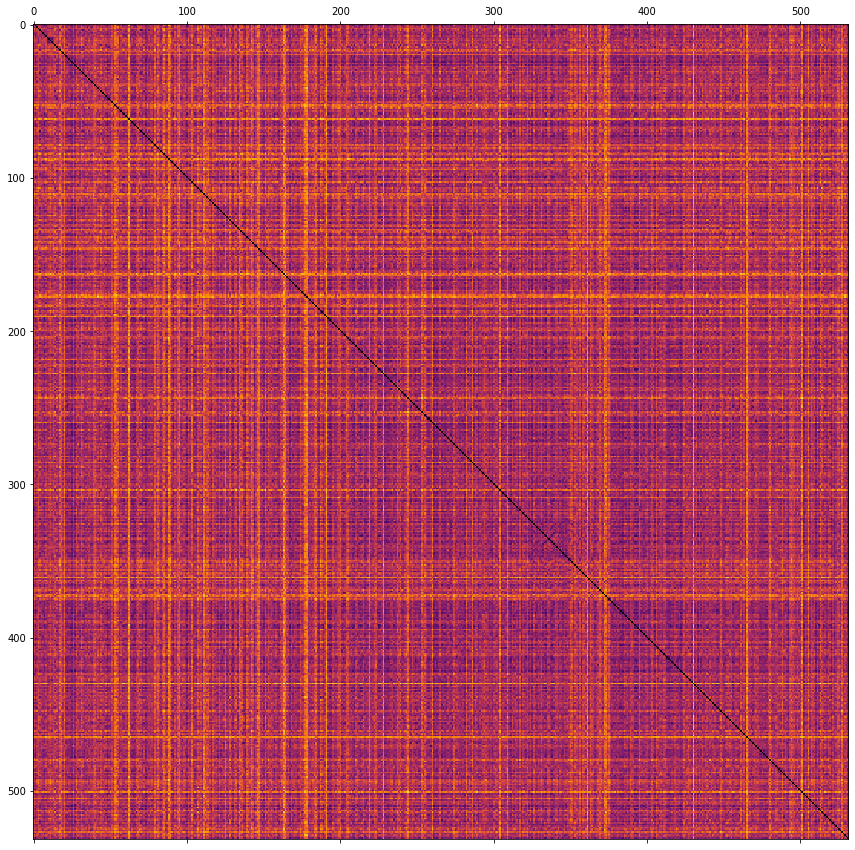

In [115]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(confusion(embed_2, embed_2), cmap = 'inferno_r')

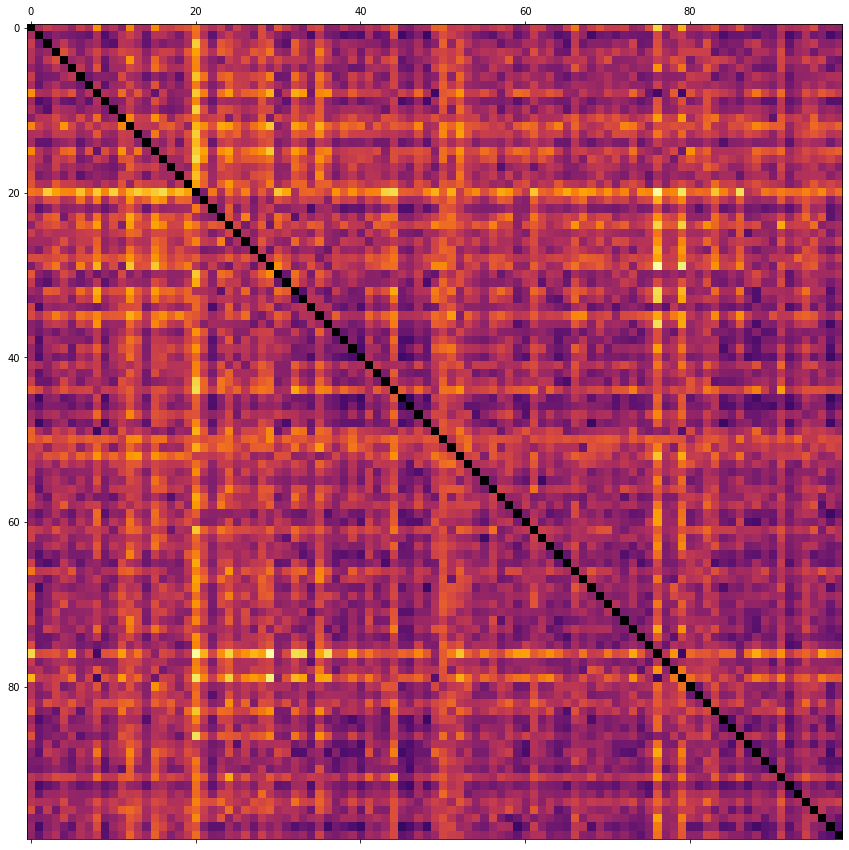

In [89]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(confusion(embed_3, embed_3), cmap = 'inferno_r')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

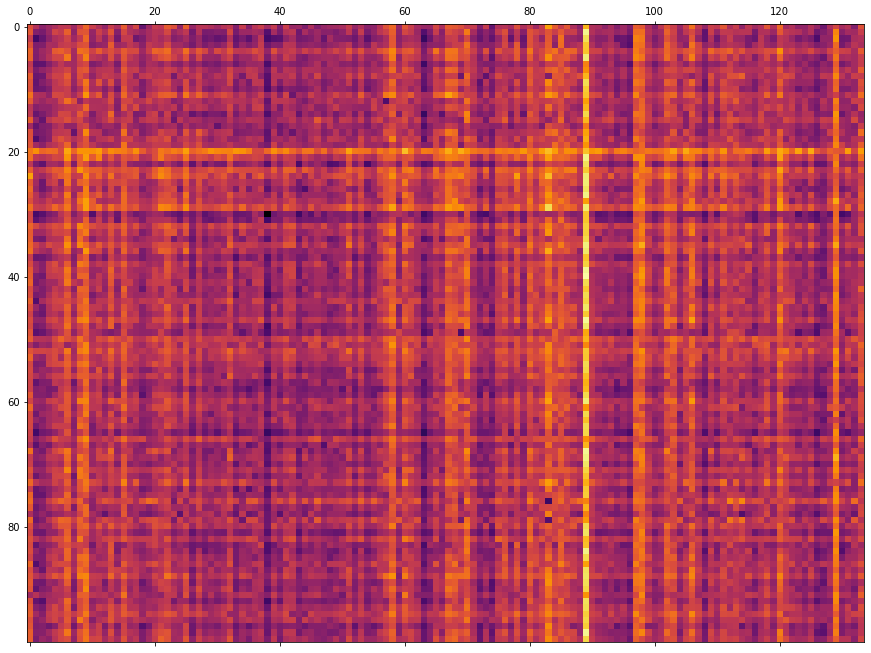

In [157]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(confusion(embed_3, embed_0), cmap = 'inferno_r')
plt.colorbar()

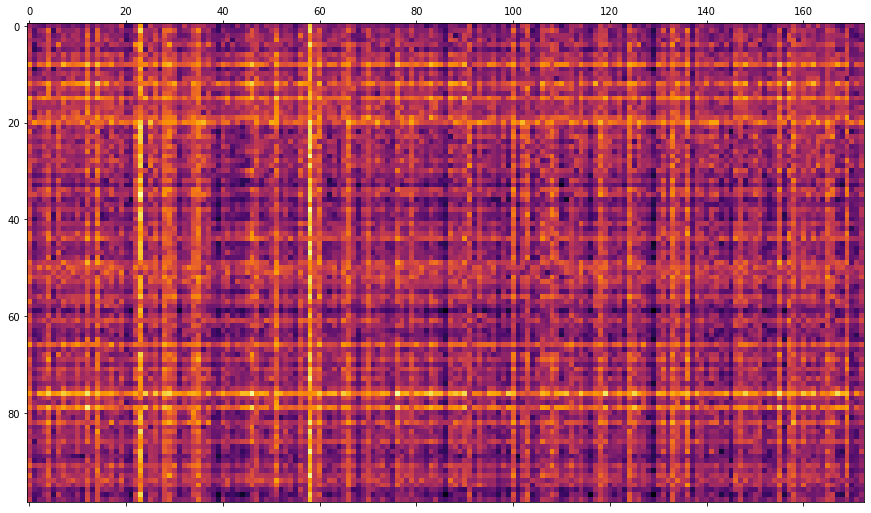

In [95]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(confusion(embed_3, embed_1), cmap = 'inferno_r')

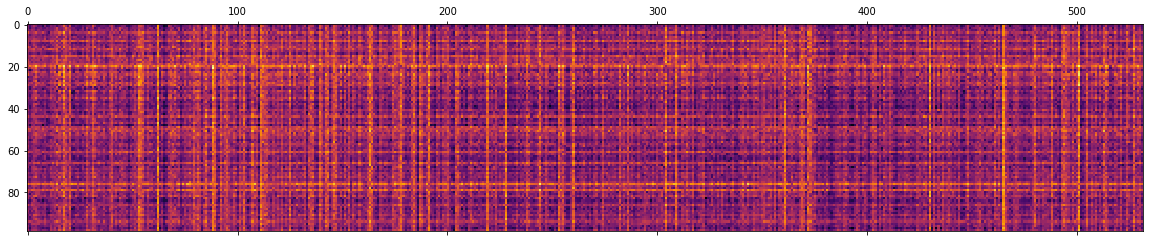

In [112]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(confusion(embed_3, embed_2), cmap = 'inferno_r')

In [94]:
len(cluster_3)

99

# Some histograms

In [116]:
from sklearn.metrics.pairwise import cosine_similarity

Taking a sentence that could be in two clusters, calculate cosin sim between that sentence and others.  Make a histogram of the similarities

Choosing the sentence regarding both cooking and training

In [121]:
tester = model.encode(["I don't believe cooks and bakers are trained as well as they might be during the time they attend school.. Much wonderful food is wasted because of improper seasoning and messy preparation. [paragraph] Character should be given more consideration in the draft. There is entirely too much training in all arm posts I've been in. Army police cannot cope with things on the move as they should. From my experience in classification work I can say that character doesn't get a second thought at most"])

In [128]:

cosine_similarity(tester, tester)

array([[0.99999994]], dtype=float32)

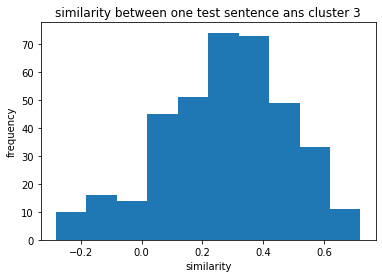

In [152]:
sims1 = []
for i in embed_split_3:
    sims1.append(cosine_similarity(tester, [i])[0][0])
plt.hist(sims1);  
plt.title('similarity between one test sentence ans cluster 3')
plt.ylabel('frequency')
plt.xlabel('similarity');

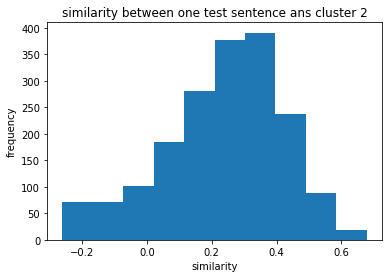

In [153]:
sims2 = []
for i in embed_split_2:
    sims2.append(cosine_similarity(tester, [i])[0][0])
plt.hist(sims2);  
plt.title('similarity between one test sentence ans cluster 2')
plt.ylabel('frequency')
plt.xlabel('similarity');

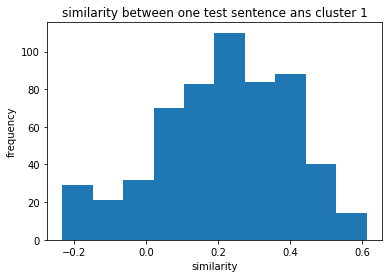

In [154]:
sims3 = []
for i in embed_split_1:
    sims3.append(cosine_similarity(tester, [i])[0][0])
plt.hist(sims3);  
plt.title('similarity between one test sentence ans cluster 1')
plt.ylabel('frequency')
plt.xlabel('similarity');

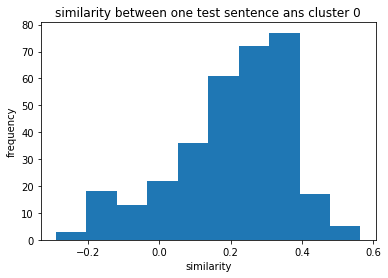

In [155]:
sims4 = []
for i in embed_split_0:
    sims4.append(cosine_similarity(tester, [i])[0][0])
plt.hist(sims4);  
plt.title('similarity between one test sentence ans cluster 0')
plt.ylabel('frequency')
plt.xlabel('similarity');